In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels as sm

### 
# Section 1: Construct Trend, Seasonality, and Residual Components
In today's lecture, we'll separately fabricate trend, seasonal, and error components 
as a pedagogical exercise. The aim is to illustrate the fundamentals of constructing a 
basic time series dataset, paving the way for more advanced topics. For now, lt's generate a time sequence in minute intervals.

In [2]:
# # Define time
# time = np.arange(1, 90)

## Exercise 1
1. Initialize the Time Series: Start by initializing a time series with the time ranging from 1 to 90. Use NumPy's arange method for this.
2. Create the Trend Component: Generate a trend component by multiplying the time series by 2.75.
3. Create the Seasonal Component: Generate a seasonal component using a sinusoidal function.
4. Create the Residual Component: Generate a residual (or error) component with a normal distribution centered at 0 and a standard deviation of 1. Make sure to set a random seed **42** for reproducible results.
5. Create an Additive Model: Combine the trend, seasonal, and residual components to form an additive time series model.
6. Create a Multiplicative Model: Use the trend and seasonal components to create a multiplicative model. For this exercise, we will ignore the residual component by setting it to one.


### Expected Outcomes:
You should be able to visualize the individual components: trend, seasonal, and residual.
You will create two composite time series: one additive and one multiplicative, and understand how each component contributes to the overall time series.


### Additional Notes:
Make sure to label the axes and provide legends in the plots for better understanding.
Feel free to experiment with different constants and functions for generating the trend and seasonal components.

In [3]:
seed = 42

np.random.seed(seed)

In [4]:
# Define time
time = np.arange(1, 90)

# 2. Define the trend component
trend_comp = 2.75 * time

# 3. Seasonal Component (using sinuoidal function)
seasonal_comp = 36 * np.sin(2 * np.pi * time / 12)

# 4. create residual component (normal distribution with mean 0 and standard deviation 1)
residual_comp = np.random.normal(0, 1, time.shape)

# 5. Additive Model
additive_model = trend_comp + seasonal_comp + residual_comp

# 6. Multiplicative Model
multiplicative_model = trend_comp * seasonal_comp * 1

In [5]:
# visualize trend, seasonal and residual components. Also visualize the additive and multiplicative models
df = pd.DataFrame({
    'time': time,
    'trend': trend_comp,
    'seasonal': seasonal_comp,
    'residual': residual_comp,
    'additive': additive_model,
    'multiplicative': multiplicative_model
})

# Plot trend
fig = px.line(df, x='time', y='trend', title='Trend Component')
fig.show()

# Plot seasonal
fig = px.line(df, x='time', y='seasonal', title='Seasonal Component')
fig.show()

# Plot residual
fig = px.line(df, x='time', y='residual', title='Residual Component')
fig.show()

# Plot additive model
fig = px.line(df, x='time', y='additive', title='Additive Model')
fig.show()

# Plot multiplicative model
fig = px.line(df, x='time', y='multiplicative', title='Multiplicative Model')
fig.show()

## Exercise 2
In this exercise, your task is two-fold:
1. Determine if **Dataset_A** and **Dataset_B** are additive or multiplicative time series.
2. Determine the frequency of the seasonal component.

### Dataset A

In [6]:
PATH_TO_FILE = "../data/tsa01"

In [7]:
# Your code here
# load Dataset_A and Dataset_B (npy)
dataset_a = np.load(f"{PATH_TO_FILE}/Dataset_A.npy")
dataset_b = np.load(f"{PATH_TO_FILE}/Dataset_B.npy")

# 1. Create a time series plot for Dataset_A and Dataset_B
ts_a = pd.DataFrame({
    'time': np.arange(1, dataset_a.shape[0] + 1),
    'value': dataset_a
})

ts_b = pd.DataFrame({
    'time': np.arange(1, dataset_b.shape[0] + 1),
    'value': dataset_b
})

# Plot Dataset_A
fig = px.line(ts_a, x='time', y='value', title='Dataset A')
fig.show()

# Plot Dataset_B
fig = px.line(ts_b, x='time', y='value', title='Dataset B')
fig.show()

#### Qeustions Dataset A
Q1: Is the time series of Dataset A Additiv or Multiplicative

A1: Multiplicative

Q2: What is the frequency of the time series:

A2: 10

In [8]:
# Your code here

#### Qeustions Dataset B
Q1: Is the time series of Dataset B Additiv or Multiplicative

A1: Additive

Q2: What is the frequency of the time series:

A2: 25 

## Exercise 3

In this section, we'll switch gears to deconstruct time series data into its core elements. We'll explore both additive and multiplicative time series and dissect them into their primary components: trend, seasonality, and residual noise.

It's crucial to clarify that our objective here isn't to delve into the intricacies of how this decomposition occurs. Instead, our aim is to demonstrate that time series data, once created, can be broken down into these foundational components for further analysis.

**Note**: You can either use statsmodels decompose method or the one from darts package

**Task**
In this exercise, your task is decompose **Dataset_A** and **Dataset_B**. You should first create a
decomposition model in Python. Then you should plot the original series, the trend, seasonality, and residuals, in that order. 

In [9]:
# Imports here
from statsmodels.tsa.seasonal import seasonal_decompose

### Dataset A

In [10]:
# Your Code here
dm_a = seasonal_decompose(dataset_a, model='multiplicative', period=10)

# Create a time series plot for the trend, seasonal and residual components of Dataset_A
ts_a_decomposed = pd.DataFrame({
    'time': np.arange(1, dataset_a.shape[0] + 1),
    'trend': dm_a.trend,
    'seasonal': dm_a.seasonal,
    'residual': dm_a.resid
})

# Plot original a
fig = px.line(ts_a, x='time', y='value', title='Dataset A')
fig.show()

# Plot trend
fig = px.line(ts_a_decomposed, x='time', y='trend', title='Trend Component')
fig.show()

# Plot seasonal
fig = px.line(ts_a_decomposed, x='time', y='seasonal', title='Seasonal Component')
fig.show()

# Plot residual
fig = px.line(ts_a_decomposed, x='time', y='residual', title='Residual Component')
fig.show()

### Dataset B

In [11]:
# Your Code here
dm_b = seasonal_decompose(dataset_b, model='additive', period=25)

# Create a time series plot for the trend, seasonal and residual components of Dataset_B
ts_b_decomposed = pd.DataFrame({
    'time': np.arange(1, dataset_b.shape[0] + 1),
    'trend': dm_b.trend,
    'seasonal': dm_b.seasonal,
    'residual': dm_b.resid
})

# Plot original b
fig = px.line(ts_b, x='time', y='value', title='Dataset B')
fig.show()

# Plot trend
fig = px.line(ts_b_decomposed, x='time', y='trend', title='Trend Component')
fig.show()

# Plot seasonal
fig = px.line(ts_b_decomposed, x='time', y='seasonal', title='Seasonal Component')
fig.show()

# Plot residual
fig = px.line(ts_b_decomposed, x='time', y='residual', title='Residual Component')
fig.show()

## Topic: Stationarity

To assess and compare the stationarity of two different time series datasets (births and airline passengers) using various techniques.

Methods to be Used:
- Run-sequence plot
- Summary statistics (mean and variance)
- Histogram plots
- Augmented Dickey-Fuller (ADF) test


**Task:**
1. Correctly identify whether each dataset is stationary or non-stationary.
2. Correctly interpret the summary statistics, histograms, and ADF test results.
3. Provide a coherent comparative analysis of the stationarity of both datasets.

### Exercise 4: Run-Sequence Plot
Task:
Plot a run-sequence plot for both the airline passengers and births datasets to visually inspect them for any obvious trends, seasonality, or other non-stationary behaviors.

In [12]:
import pandas as pd

# Load datasets
airline_data = pd.read_csv(f"{PATH_TO_FILE}/airline-passengers.csv")
birth_data = pd.read_csv(f"{PATH_TO_FILE}/births.csv")

In [13]:
# Your code here
# Create a time series plot for the airline data
airline_data['Month'] = pd.to_datetime(airline_data['Month'])
passengers = airline_data['Passengers']
fig = px.line(airline_data, x='Month', y='Passengers', title='Airline Passengers')
fig.show()

birth_data['Date'] = pd.to_datetime(birth_data['Date'])
births = birth_data['Births']
fig = px.line(birth_data, x='Date', y='Births', title='Births')
fig.show()

c:\Storage\Workspace\Python\Master\summerschool24\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



c:\Storage\Workspace\Python\Master\summerschool24\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Exercise 5: Plot Mean and Variance Over Time
Task:
Divide both datasets into monthly segments and calculate the mean and variance for each segment to check if they change over time.


In [14]:
# Your code here

# mean over years in passenger data
airline_data['year'] = airline_data['Month'].dt.year
airline_data['month'] = airline_data['Month'].dt.month
airline_data['day'] = airline_data['Month'].dt.day

airline_means = airline_data.groupby('year').mean()
airline_vars = airline_data.groupby('year')['Passengers'].var()
airline_means['year'] = airline_means.index

fig = px.line(airline_means, x='year', y='Passengers', title='Mean Airline Passengers over Years')
fig.show()

fig = px.line(airline_vars, x=airline_vars.index, y='Passengers', title='Variance Airline Passengers over Years')
fig.show()

In [15]:
# mean over years in birth data
birth_data['year'] = birth_data['Date'].dt.year
birth_data['month'] = birth_data['Date'].dt.month
birth_data['day'] = birth_data['Date'].dt.day

birth_means = birth_data.groupby('month').mean()
birth_vars = birth_data.groupby('month')['Births'].var()
birth_means['month'] = birth_means.index

fig = px.line(birth_means, x='month', y='Births', title='Mean Births over Months')
fig.show()

fig = px.line(birth_vars, x=birth_vars.index, y='Births', title='Variance Births over Months')
fig.show()

### Exercise 6: Assessing Stationarity with Histogram Plots
Task:
Plot histograms for both the airline passengers and births datasets to visually inspect their distributions. Assess whether the data appears to be normally distributed, which is one of the hallmarks of a stationary series.

In [16]:
# Your code here
fig = px.histogram(airline_data, x='Passengers', title='Airline Passengers Histogram')
fig.show()

fig = px.histogram(birth_data, x='Births', title='Births Histogram')
fig.show()

### Exercise 7: Augmented Dickey-Fuller Test
Task:
Perform the Augmented Dickey-Fuller test on both datasets to statistically check for stationarity. Interpret the results, including the ADF statistic, the p-value, and the critical values, to determine whether the series are stationary or not.

In [17]:
# Your code here
# augmented dickey-fuller test
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on airline data
result = adfuller(airline_data['Passengers'])
print(f'\n### Airline Data ###\n')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Perform Augmented Dickey-Fuller test on birth data
result = adfuller(birth_data['Births'])
print(f'\n### Birth Data ###\n')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')


### Airline Data ###

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}

### Birth Data ###

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05
Critical Values: {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}


### Exercise 8: Autocorrelation
Task: Evaluate the autocorellation of both datasets using methods from todays lecture. Are there any significant lags for a later forecast?


### Airline Data ###


### Birth Data ###



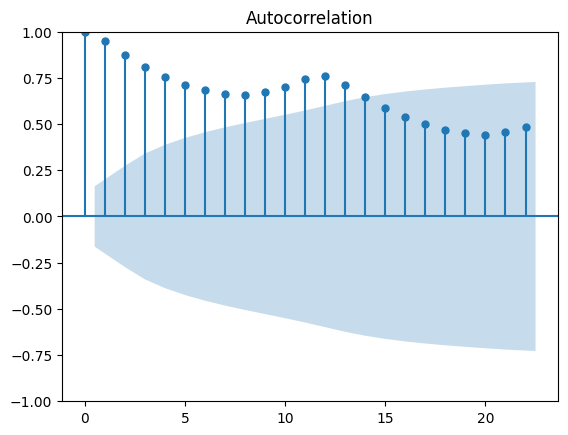

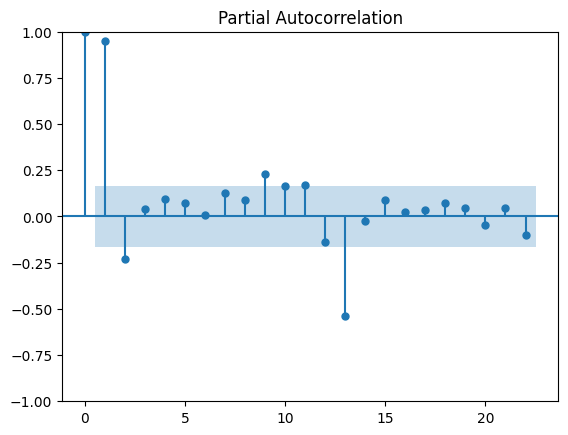

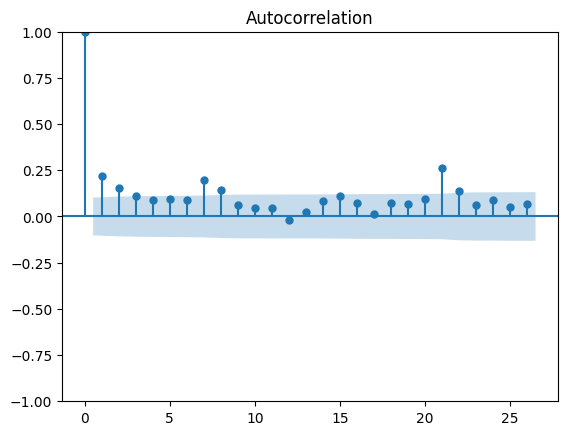

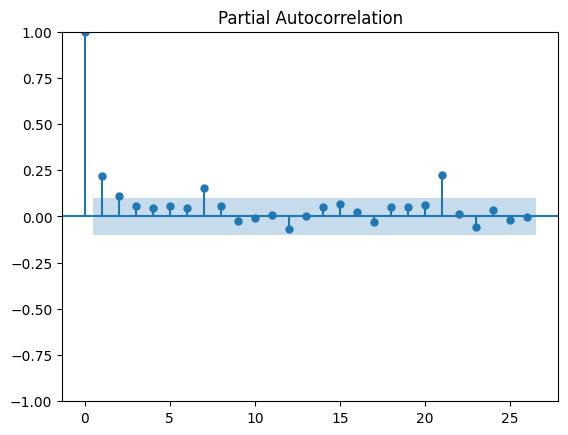

In [18]:
# Your code here
# Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF) for airline data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print(f'\n### Airline Data ###\n')
_ = plot_acf(airline_data['Passengers'])
_ = plot_pacf(airline_data['Passengers'])

# Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF) for birth data
print(f'\n### Birth Data ###\n')
_ = plot_acf(birth_data['Births'])
_ = plot_pacf(birth_data['Births'])